In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import load_breast_cancer # Import the dataset loader

np.random.seed(42)

In [4]:
#  1. Load Dataset

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumns:")
print(df.columns.tolist())

Shape of dataset: (569, 31)

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  wo

In [5]:
#2. Select Continuous Features

continuous_features = df.drop(columns=["target"])
print("\nSelected continuous features for transformation.")
print(continuous_features.describe())



Selected continuous features for transformation.
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380

In [6]:
#3. Quantization

quantizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
quantized_data = quantizer.fit_transform(continuous_features)
df_quantized = pd.DataFrame(quantized_data, columns=continuous_features.columns)

df_with_quantized = df.copy()
for col in df_quantized.columns:
    df_with_quantized[col + "_quantized"] = df_quantized[col].astype(int)

print("\nFirst 5 rows with quantized features added:")
print(df_with_quantized.head())


First 5 rows with quantized features added:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius_qu

In [7]:
#4. Binning

df_binned = df.copy()
for col in continuous_features.columns:
    # Equal-width binning
    df_binned[col + "_bin_width"] = pd.cut(df[col], bins=4, labels=[0,1,2,3])
    # Equal-frequency binning
    df_binned[col + "_bin_freq"] = pd.qcut(df[col], q=4, labels=[0,1,2,3], duplicates='drop')

print("\nFirst 5 rows with binned features added:")
print(df_binned.head())



First 5 rows with binned features added:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst compactness_

In [8]:
#5. Merging Columns
df_transformed = df.copy()
for col in continuous_features.columns:
    df_transformed[col + "_quantized"] = df_with_quantized[col + "_quantized"]
    df_transformed[col + "_bin_width"] = df_binned[col + "_bin_width"]

print("\nShape of final DataFrame:", df_transformed.shape)


Shape of final DataFrame: (569, 91)


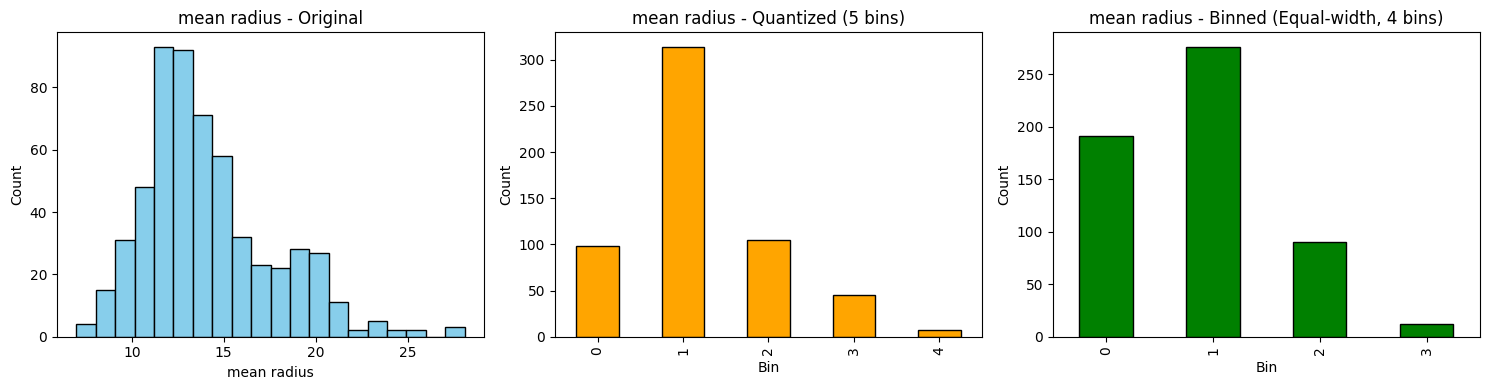

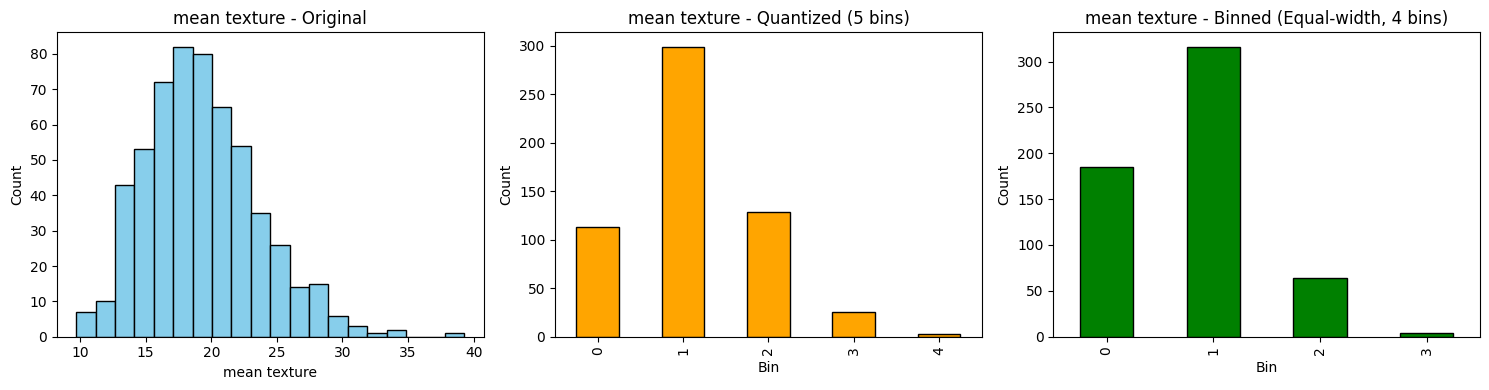

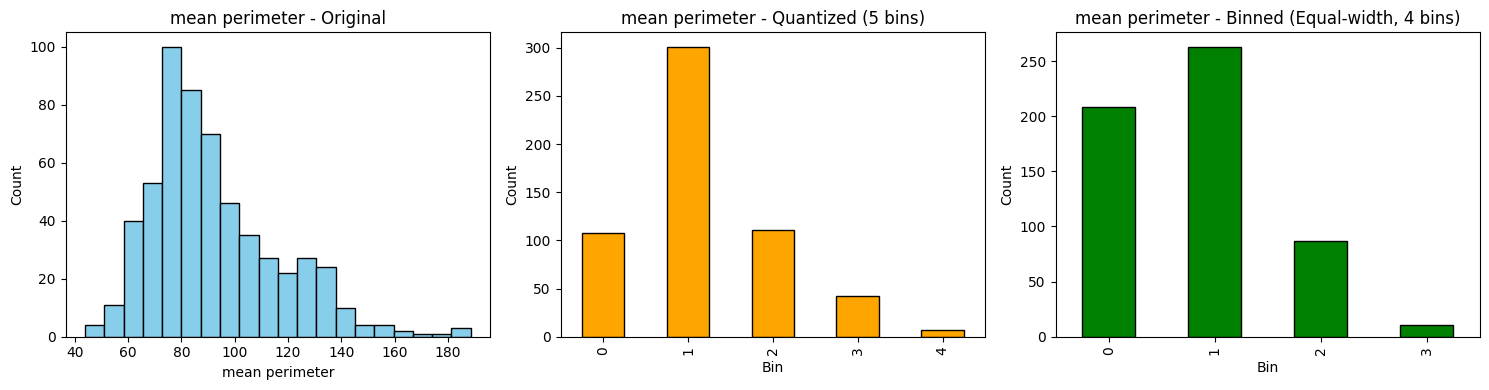

In [9]:
#6. Plotting

features_to_plot = ["mean radius", "mean texture", "mean perimeter"]

for feature in features_to_plot:
    plt.figure(figsize=(15, 4))

    # Original distribution
    plt.subplot(1, 3, 1)
    plt.hist(df[feature], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"{feature} - Original")
    plt.xlabel(feature)
    plt.ylabel("Count")

    # Quantized distribution
    plt.subplot(1, 3, 2)
    df_transformed[feature + "_quantized"].value_counts().sort_index().plot(
        kind="bar", color="orange", edgecolor="black"
    )
    plt.title(f"{feature} - Quantized (5 bins)")
    plt.xlabel("Bin")
    plt.ylabel("Count")

    # Equal-width binned distribution
    plt.subplot(1, 3, 3)
    df_transformed[feature + "_bin_width"].value_counts().sort_index().plot(
        kind="bar", color="green", edgecolor="black"
    )
    plt.title(f"{feature} - Binned (Equal-width, 4 bins)")
    plt.xlabel("Bin")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()